In [1]:
from sklearn.datasets import load_diabetes

In [12]:
dataset=load_diabetes()

In [13]:
dataset


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [14]:
print(type(dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [15]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=[
    'age',
    'sex',
    'bmi',
    'bp',
    's1',
    's2',
    's3',
    's4',
    's5',
    's6'

])

In [17]:
X=df_diabetes
y=dataset['target']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [20]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

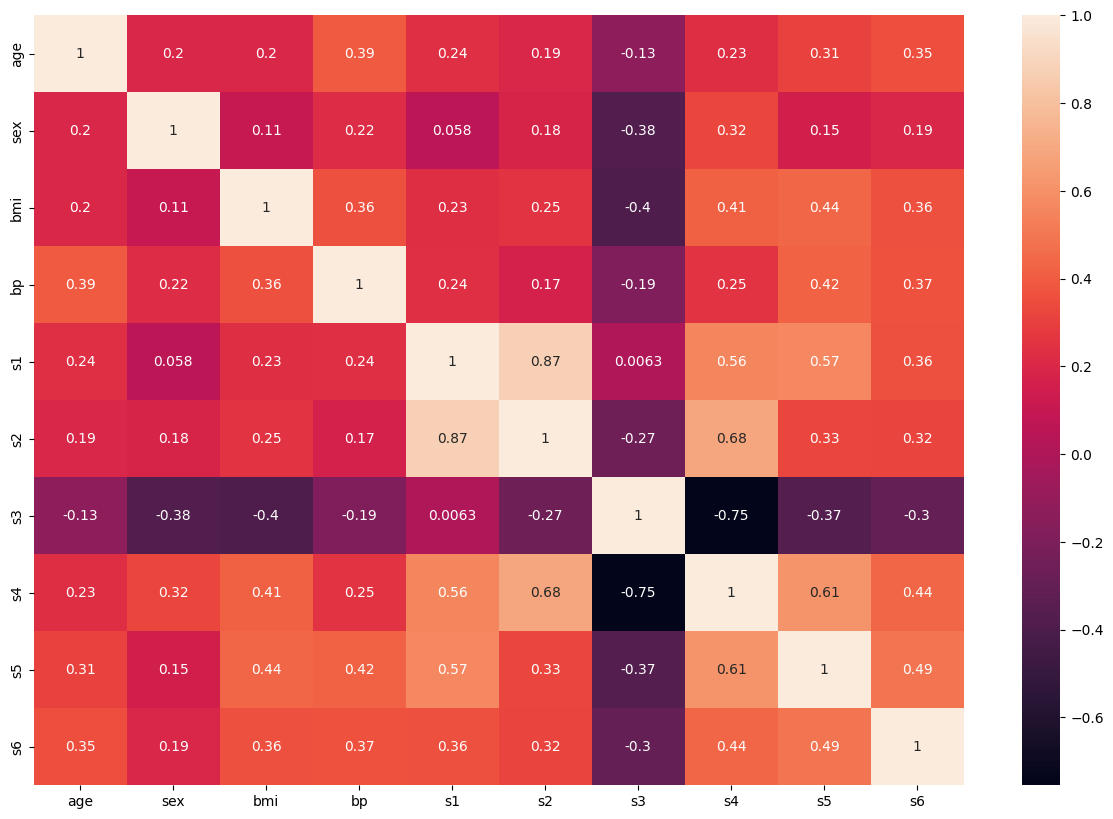

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

In [25]:
param={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [26]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['auto', 'sqrt', 'log2']}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
regressor=DecisionTreeRegressor()

In [36]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [38]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [39]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [40]:
y_pred=grid.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [42]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.30349426200717244
55.50167682089725
4407.259225820318


In [43]:
selectmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [44]:
selectmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[0] <= 0.031\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[2] <= 0.103\nfriedman_mse = 5735.687\nsamples = 221\nvalue = 143.543'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= -0.032\nfriedman_mse = 5325.764\nsamples = 215\nvalue = 139.777'),
 Text(0.0625, 0.3, 'x[2] <= 0.047\nfriedman_mse = 2936.626\nsamples = 88\nvalue = 104.818'),
 Text(0.03125, 0.1, 'friedman_mse = 2964.075\nsamples = 84\nvalue = 103.143'),
 Text(0.09375, 0.1, 'friedman_mse = 1063.5\nsamples = 4\nvalue = 140.0'),
 Text(0.1875, 0.3, 'x[6] <= -0.017\nfriedman_mse = 5547.654\nsamples = 127\nvalue = 164.0'),
 Text(0.15625, 0.1, 'friedman_mse = 5434.667\nsamples = 81\nvalue = 176.778'),
 Text(0.21875, 0.1, 'friedman_mse = 4952.859\nsamples = 46\nvalue = 141.5'),
 Text(0.375, 0.5, 'x[1] <= -0.006\nfriedman_mse = 1702.917\nsamples = 6\nvalue = 278.5'),
 Text(0.3125, 0.3, 'x[2] <= 0.13\nfriedman_mse = 1496.222\nsamples = 3\nvalue = 291.667'),
 Text(0.28125, 0.1

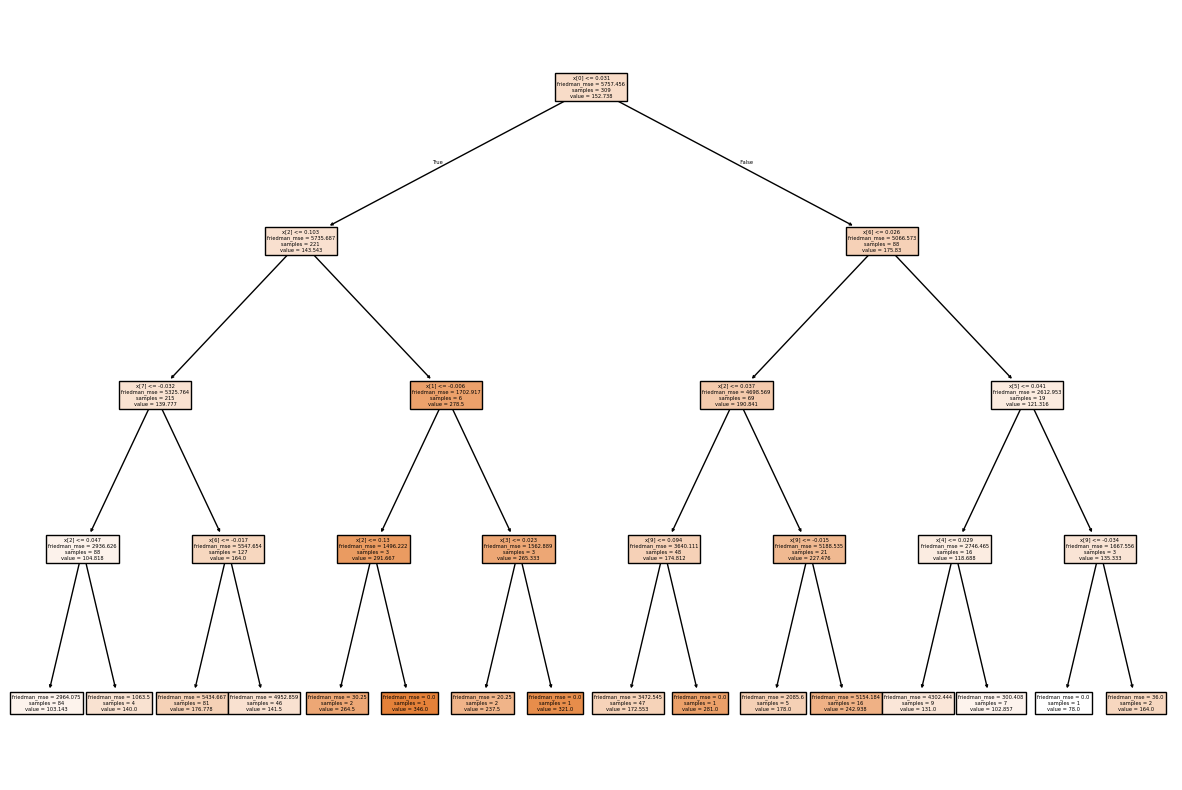

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)